In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Usando o pacote Pandas para ler o arquivo CSV separado por ";"

In [2]:
df = pd.read_csv("financing_2022-06-08_16h53m00_ad.csv", sep=";")

##### Analisando as primeiras linhas para ter uma ideia de como está formatado o dataframe e iniciar a limpeza dos dados

In [3]:
df.head(3)

,Id,Valor,Data de depósito (ou compra),Status,Data de reserva,Project name,Id [Usuário],Data de nascimento [Usuário],Tag [Projeto]
0,85,2000.0,13 de Agosto de 2019,approved,"10 de Julho de 2019, 00:07",Eirene Solutions,13.0,30 de Abril de 1992,Agrotech
1,86,1000.0,12 de Agosto de 2019,approved,"10 de Julho de 2019, 00:06",Eirene Solutions,9.0,27 de Maio de 1982,Agrotech
2,89,1000.0,12 de Julho de 2019,approved,"10 de Julho de 2019, 04:13",Trashin,643.0,07 de Dezembro de 1980,Cleantech


##### Alterando os cabeçalhos utilizando list comprehension

In [4]:
df.columns = [col.title() for col in df.columns]
df.head(3)

,Id,Valor,Data De Depósito (Ou Compra),Status,Data De Reserva,Project Name,Id [Usuário],Data De Nascimento [Usuário],Tag [Projeto]
0,85,2000.0,13 de Agosto de 2019,approved,"10 de Julho de 2019, 00:07",Eirene Solutions,13.0,30 de Abril de 1992,Agrotech
1,86,1000.0,12 de Agosto de 2019,approved,"10 de Julho de 2019, 00:06",Eirene Solutions,9.0,27 de Maio de 1982,Agrotech
2,89,1000.0,12 de Julho de 2019,approved,"10 de Julho de 2019, 04:13",Trashin,643.0,07 de Dezembro de 1980,Cleantech


#### Renomeando múltiplas colunas

In [5]:
df.rename(columns={"Id [Usuário]" :"User_ID", "Data De Nascimento [Usuário]" : "User_birthday", "Tag [Projeto]" : "Tag"}, 
          inplace=True)

##### Filtrando os valores onde o User_ID é nulo e posteriormente deletando a linha

In [6]:
df[df["User_ID"].isnull()]

,Id,Valor,Data De Depósito (Ou Compra),Status,Data De Reserva,Project Name,User_ID,User_birthday,Tag
3728,8522,2400.0,05 de Novembro de 2020,approved,"04 de Novembro de 2020, 17:43",Wuzu,NaN,NaN,Fintech


In [7]:
df.drop(3728, inplace=True)

##### Utilizando o método info() para checar se há possibilidade de melhorar a eficiência em termos de memória e se os datatypes estão corretos

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15881 entries, 0 to 15881
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Id                            15881 non-null  int64  
 1   Valor                         15881 non-null  float64
 2   Data De Depósito (Ou Compra)  15881 non-null  object 
 3   Status                        15881 non-null  object 
 4   Data De Reserva               15881 non-null  object 
 5   Project Name                  15881 non-null  object 
 6   User_ID                       15881 non-null  float64
 7   User_birthday                 15881 non-null  object 
 8   Tag                           15881 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 1.2+ MB


In [9]:
df["Status"].nunique()

1

In [10]:
df["Status"] = df["Status"].astype("category")

In [11]:
df["User_ID"] = df["User_ID"].astype(int)

In [12]:
tag_qtd = df["Tag"].nunique()
df["Tag"] = df["Tag"].astype("category")
print(f"Quantidade de tags: {tag_qtd}")

Quantidade de tags: 23


In [13]:
df["Data De Reserva"].value_counts().sort_values(ascending = False).head(3)

 -                             192
05 de Maio de 2022, 10:19        7
31 de Agosto de 2021, 10:26      6
Name: Data De Reserva, dtype: int64

#### Retirando espaços em branco

In [14]:
df["Data De Depósito (Ou Compra)"] = df["Data De Depósito (Ou Compra)"].str.strip()

#### Formatando as datas para converter a coluna em um datetime com pd.to_datetime

In [15]:
df["Data De Depósito (Ou Compra)"] = df["Data De Depósito (Ou Compra)"].str.replace("de", "").str.replace("  ", "-").str.replace("Janeiro", "01").str.replace("Fevereiro", "02").str.replace("Março", "03").str.replace("Abril", "04").str.replace("Maio", "05").str.replace("Junho", "06").str.replace("Julho", "07").str.replace("Agosto", "08").str.replace("Setembro", "09").str.replace("Outubro", "10").str.replace("Novembro", "11").str.replace("Dezembro", "12")

In [16]:
df["Data De Depósito (Ou Compra)"].sort_values(ascending=False).head()

4571    31-12-2020
4239    31-12-2020
4569    31-12-2020
4570    31-12-2020
9110    31-08-2021
Name: Data De Depósito (Ou Compra), dtype: object

In [17]:
df["Data De Depósito (Ou Compra)"] = pd.to_datetime(df["Data De Depósito (Ou Compra)"], format='%d-%m-%Y')

#### Checando se há uma data nula

In [18]:
df["Data De Depósito (Ou Compra)"].isna().values.any()

False

In [19]:
df["User_birthday"] = df["User_birthday"].str.replace("de", "").str.replace("  ", "-").str.replace("Janeiro", "01").str.replace("Fevereiro", "02").str.replace("Março", "03").str.replace("Abril", "04").str.replace("Maio", "05").str.replace("Junho", "06").str.replace("Julho", "07").str.replace("Agosto", "08").str.replace("Setembro", "09").str.replace("Outubro", "10").str.replace("Novembro", "11").str.replace("Dezembro", "12").str.strip()

In [20]:
df["User_birthday"] = pd.to_datetime(df["User_birthday"], format='%d-%m-%Y', errors='coerce')

In [21]:
nasc_nul = df[df["User_birthday"].isna()].shape[0]
print(f"Quantidade de datas de nascimento faltando: {nasc_nul}")

Quantidade de datas de nascimento faltando: 9


In [22]:
df["Data De Reserva"] = df["Data De Reserva"].str.strip()

#### Quantidade de linhas sem uma data de reserva

In [23]:
df[df["Data De Reserva"] == '-'].count()[1]

192

In [24]:
df["Data De Reserva"] = df["Data De Reserva"].str.replace("de", "").str.replace("  ", "-").str.replace("Janeiro", "01").str.replace("Fevereiro", "02").str.replace("Março", "03").str.replace("Abril", "04").str.replace("Maio", "05").str.replace("Junho", "06").str.replace("Julho", "07").str.replace("Agosto", "08").str.replace("Setembro", "09").str.replace("Outubro", "10").str.replace("Novembro", "11").str.replace("Dezembro", "12").str.replace(", ","-" )

In [25]:
df["Data De Reserva"] = pd.to_datetime(df["Data De Reserva"], errors='coerce', format='%d-%m-%Y-%H:%M')

In [26]:
df.head(3)

,Id,Valor,Data De Depósito (Ou Compra),Status,Data De Reserva,Project Name,User_ID,User_birthday,Tag
0,85,2000.0,2019-08-13,approved,2019-07-10 00:07:00,Eirene Solutions,13,1992-04-30,Agrotech
1,86,1000.0,2019-08-12,approved,2019-07-10 00:06:00,Eirene Solutions,9,1982-05-27,Agrotech
2,89,1000.0,2019-07-12,approved,2019-07-10 04:13:00,Trashin,643,1980-12-07,Cleantech


### Análise clientes

In [27]:
print(f"Número total de clientes únicos: {df['User_ID'].nunique()}")
print(f"Montante total investido: R$ {int(df['Valor'].sum())}")
print(f"Valor máximo investido em uma única operação: R$ {int(df['Valor'].max())}")
print(f"Valor médio por operação: R$ {round(df['Valor'].mean(), 2)}")
print(f"Índices dos clientes que investiram o máximo em pelo menos uma operação: {set(df.loc[df['Valor'] == df['Valor'].max()].index.to_list())}")
clientes_agrupados = df.groupby('User_ID')['Valor'].sum()
indice_cliente_mais_investiu = int(clientes_agrupados.idxmax())
print(f"ID do cliente que mais investiu: {int(indice_cliente_mais_investiu)}. Valor investido: R$ {clientes_agrupados.max()}. Quantidade de operações: {df.iloc[indice_cliente_mais_investiu].count()}")

Número total de clientes únicos: 6501
Montante total investido: R$ 78949330
Valor máximo investido em uma única operação: R$ 500000
Valor médio por operação: R$ 4971.31
Índices dos clientes que investiram o máximo em pelo menos uma operação: {12192, 12450, 12387, 7947, 9902, 13872, 9908, 9915, 12381}
ID do cliente que mais investiu: 649. Valor investido: R$ 1136000.0. Quantidade de operações: 9


#### Usando o método info() mais uma vez para certificar que os datatypes estão corretos

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15881 entries, 0 to 15881
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Id                            15881 non-null  int64         
 1   Valor                         15881 non-null  float64       
 2   Data De Depósito (Ou Compra)  15881 non-null  datetime64[ns]
 3   Status                        15881 non-null  category      
 4   Data De Reserva               15689 non-null  datetime64[ns]
 5   Project Name                  15881 non-null  object        
 6   User_ID                       15881 non-null  int32         
 7   User_birthday                 15872 non-null  datetime64[ns]
 8   Tag                           15881 non-null  category      
dtypes: category(2), datetime64[ns](3), float64(1), int32(1), int64(1), object(1)
memory usage: 962.4+ KB


### Obtendo uma coluna com as idades de cada usuário

In [29]:
df['User_Idade'] = (pd.to_datetime('today') - df['User_birthday']).dt.days

In [30]:
df['User_Idade'] = df['User_Idade'] // 365.25

In [31]:
df.head(3)

,Id,Valor,Data De Depósito (Ou Compra),Status,Data De Reserva,Project Name,User_ID,User_birthday,Tag,User_Idade
0,85,2000.0,2019-08-13,approved,2019-07-10 00:07:00,Eirene Solutions,13,1992-04-30,Agrotech,30.0
1,86,1000.0,2019-08-12,approved,2019-07-10 00:06:00,Eirene Solutions,9,1982-05-27,Agrotech,40.0
2,89,1000.0,2019-07-12,approved,2019-07-10 04:13:00,Trashin,643,1980-12-07,Cleantech,41.0


### Observando possíveis erros nos dados nas colunas numéricas

In [32]:
df.describe()

,Id,Valor,User_ID,User_Idade
count,15881.000000,15881.000000,15881.000000,15872.000000
mean,17511.177004,4971.307222,14886.829482,40.943611
std,9969.921821,20505.796771,10283.687160,10.780383
min,85.000000,500.000000,9.000000,-1.000000
25%,9006.000000,1000.000000,5359.000000,33.000000
50%,17565.000000,1000.000000,14301.000000,40.000000
75%,26342.000000,3000.000000,22598.000000,47.000000
max,34280.000000,500000.000000,37723.000000,122.000000


In [33]:
df["User_Idade"].nlargest(10)

10803    122.0
12618    122.0
5244      88.0
1086      86.0
6289      86.0
507       83.0
1212      83.0
1577      83.0
2098      83.0
3126      83.0
Name: User_Idade, dtype: float64

In [34]:
df[df['User_Idade'] == df['User_Idade'].max()]

,Id,Valor,Data De Depósito (Ou Compra),Status,Data De Reserva,Project Name,User_ID,User_birthday,Tag,User_Idade
10803,24097,3550.0,2021-09-28,approved,2021-09-28 09:26:00,Beaver,17477,1899-11-13,Legaltech,122.0
12618,27692,3000.0,2021-12-09,approved,2021-12-09 08:28:00,Beeva,17477,1899-11-13,Foodtech,122.0


In [35]:
df[df['User_Idade'] == df['User_Idade'].min()]

,Id,Valor,Data De Depósito (Ou Compra),Status,Data De Reserva,Project Name,User_ID,User_birthday,Tag,User_Idade
15759,33996,1000.0,2022-06-04,approved,2022-06-03 11:37:00,Auster,6704,2022-07-29,Agrotech,-1.0


In [36]:
df["User_Idade"].nsmallest(5)

15759   -1.0
4838     0.0
10266    0.0
10278    0.0
11064    0.0
Name: User_Idade, dtype: float64

In [37]:
usuarios_menores = df.loc[df['User_Idade'] < 18].count()[1]
print(f"Quantidade de usuários com menos de 18 anos: {usuarios_menores}")

Quantidade de usuários com menos de 18 anos: 28


#### Percebe-se que há ocorrência de valores nulos e errados nas colunas de data de nascimento e data de reserva.

#### Vamos investigar o padrão de investimentos dos clientes por idade. Para isso, teremos que limpar a tabela dos valores nulos e errados.

#### Vamos investigar quais são as tags e projetos mais populares em termos de número de operações e valor investido

#### Para trabalharmos com o máximo possível de informações disponíveis, vamos dividir a tabela e filtrar os valores nulos quando mecessário. As colunas de Data de Reserva e Status não serão utilizadas no resto da análise e podem ser descartadas.

In [38]:
df.drop("Data De Reserva", 1, inplace=True)

In [39]:
df.drop("Status", 1, inplace=True)

In [40]:
df_idade = df[["Id", 'User_ID', 'Valor', 'User_Idade']]
df_idade.head()

,Id,User_ID,Valor,User_Idade
0,85,13,2000.0,30.0
1,86,9,1000.0,40.0
2,89,643,1000.0,41.0
3,92,647,1000.0,35.0
4,93,647,1000.0,35.0


In [41]:
df_idade.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15881 entries, 0 to 15881
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          15881 non-null  int64  
 1   User_ID     15881 non-null  int32  
 2   Valor       15881 non-null  float64
 3   User_Idade  15872 non-null  float64
dtypes: float64(2), int32(1), int64(1)
memory usage: 558.3 KB


### Filtrando apenas valores de idade válidos

In [42]:
df_idade = df_idade.loc[(df_idade['User_Idade'] >= 18) & (df_idade['User_Idade'] < 122)]

In [43]:
df_idade.isna().values.any()
# Certificando que não há valor nulo

False

In [44]:
df_idade['User_Idade'] = df_idade['User_Idade'].astype(int)

In [45]:
df_idade_agrup = df_idade.groupby('User_Idade')


In [46]:
df_idade_agrup['Valor'].sum().nlargest(5)

User_Idade
41    5331880.0
37    4314860.0
35    3243190.0
45    3091950.0
42    2857010.0
Name: Valor, dtype: float64

In [47]:
series_plot = df_idade_agrup['Valor'].sum()
series_plot_2 = df_idade_agrup['Valor'].count()
series_plot_3 = df_idade_agrup['Valor'].mean()

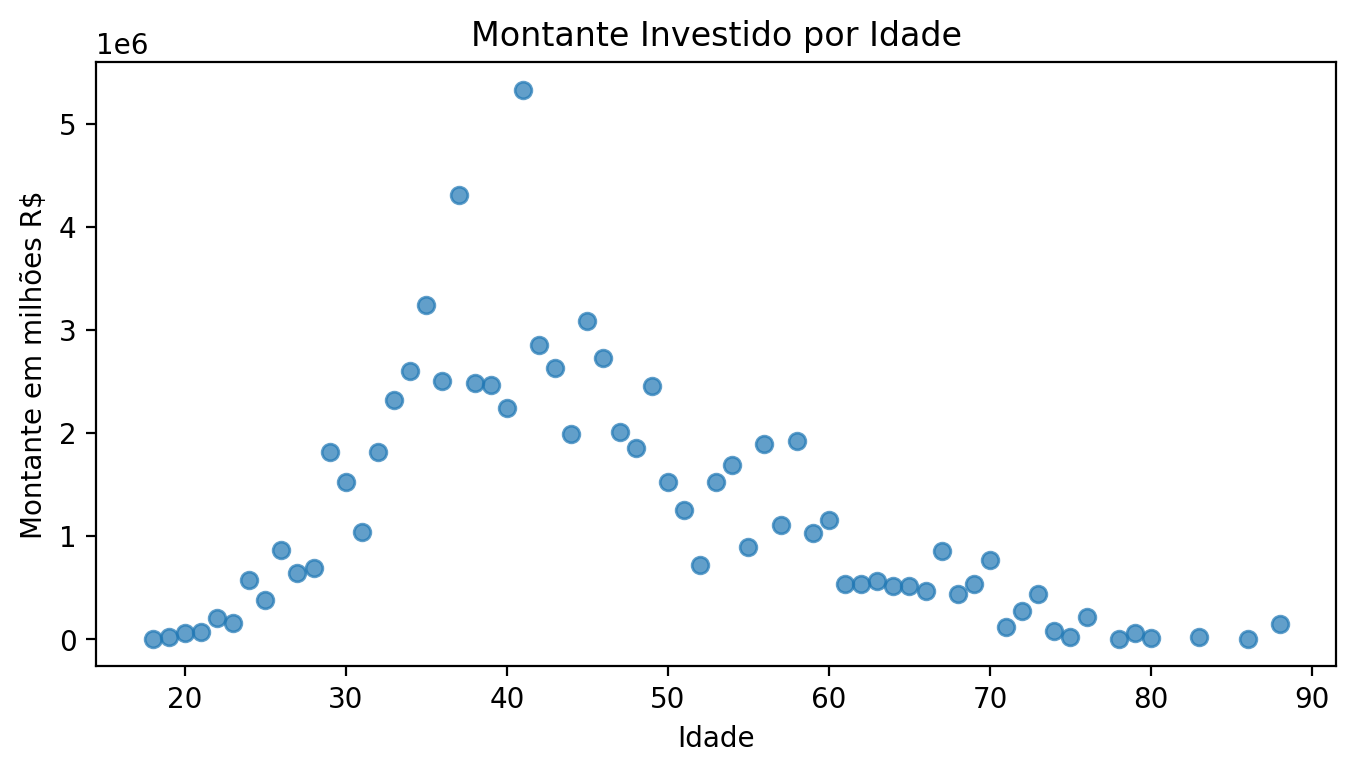

In [48]:
plt.figure(figsize=(8,4), dpi=200)

x = series_plot.index
y = series_plot.values
plt.xlabel('Idade')
plt.ylabel('Montante em milhões R$')
plt.title('Montante Investido por Idade')
plt.scatter(x, y, alpha=0.7)

plt.show()

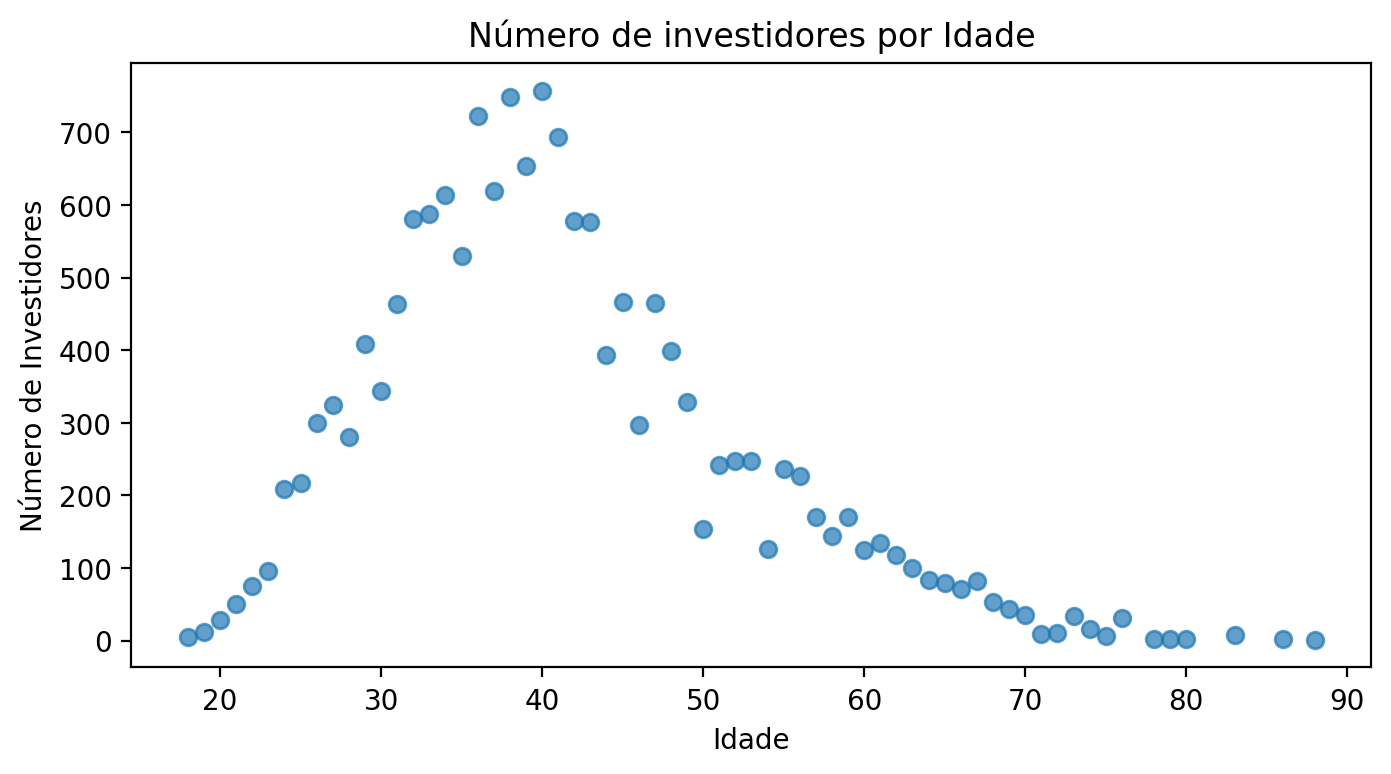

In [49]:
plt.figure(figsize=(8,4), dpi=200)

x = series_plot_2.index
y = series_plot_2.values
plt.xlabel('Idade')
plt.ylabel('Número de Investidores')
plt.title('Número de investidores por Idade')
plt.scatter(x, y, alpha=0.7)

plt.show()

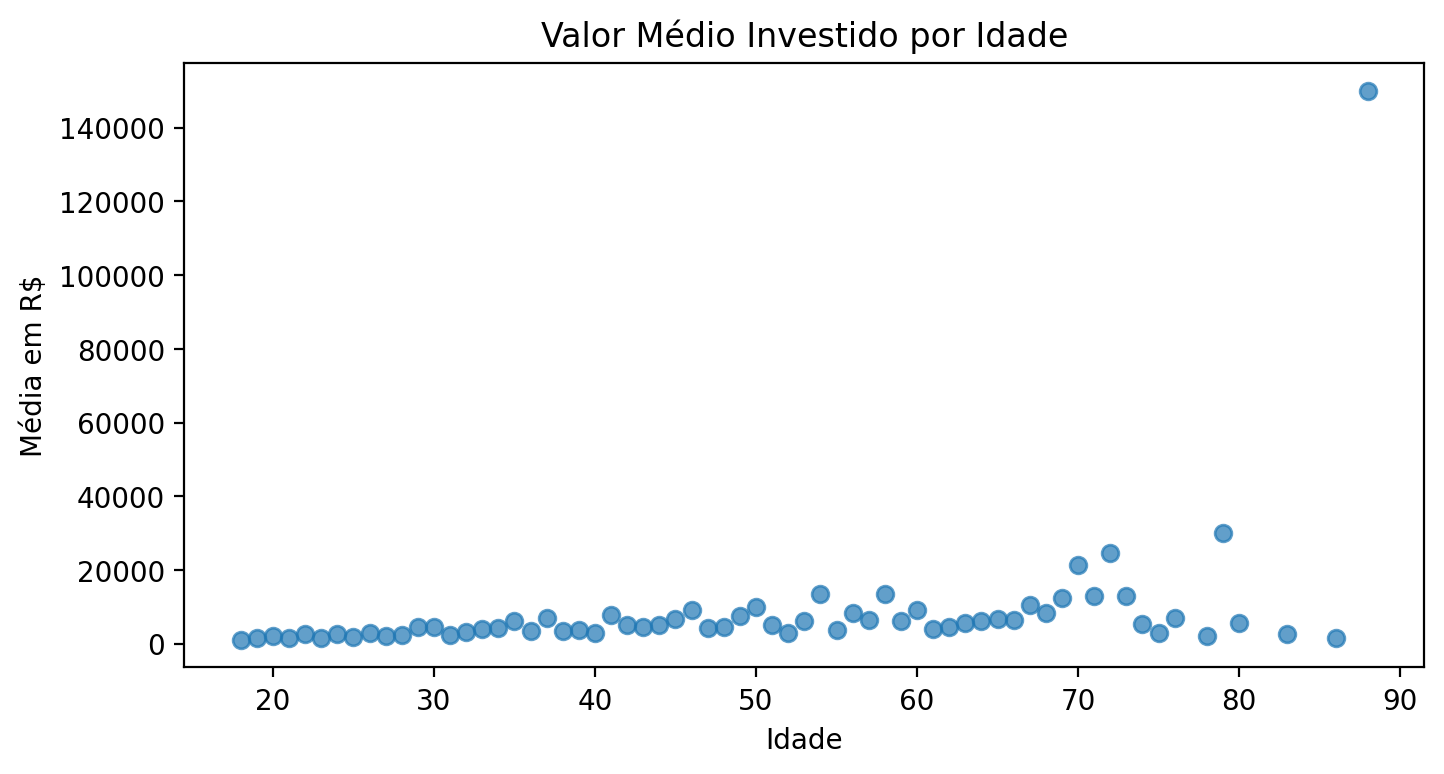

In [50]:
plt.figure(figsize=(8,4), dpi=200)

x = series_plot_3.index
y = series_plot_3.values
plt.xlabel('Idade')
plt.ylabel('Média em R$')
plt.title('Valor Médio Investido por Idade')
plt.scatter(x, y, alpha=0.7)

plt.show()

In [51]:
series_plot_3.sort_values(ascending=False)[3:]

User_Idade
70    21305.555556
58    13397.222222
54    13395.634921
73    12910.294118
71    12888.888889
          ...     
23     1635.000000
86     1500.000000
19     1476.666667
21     1416.274510
18     1000.000000
Name: Valor, Length: 62, dtype: float64

In [52]:
series_plot_3.loc[series_plot_3.index < 88]

User_Idade
18     1000.000000
19     1476.666667
20     2000.344828
21     1416.274510
22     2746.052632
          ...     
78     2000.000000
79    30000.000000
80     5500.000000
83     2662.500000
86     1500.000000
Name: Valor, Length: 64, dtype: float64

In [53]:
series_plot_no_outlier = series_plot_3.loc[series_plot_3.index < 88]

In [54]:
X = np.array(series_plot_no_outlier.index).reshape(-1,1)
y = np.array(series_plot_no_outlier.values).reshape(-1,1)

In [55]:
regressao = LinearRegression()

resultado = regressao.fit(X,y)

In [56]:
print(resultado.coef_[0][0])
print(resultado.intercept_[0])
print(regressao.score(X,y))

139.4188738096928
-618.6010239884636
0.24323834771607922


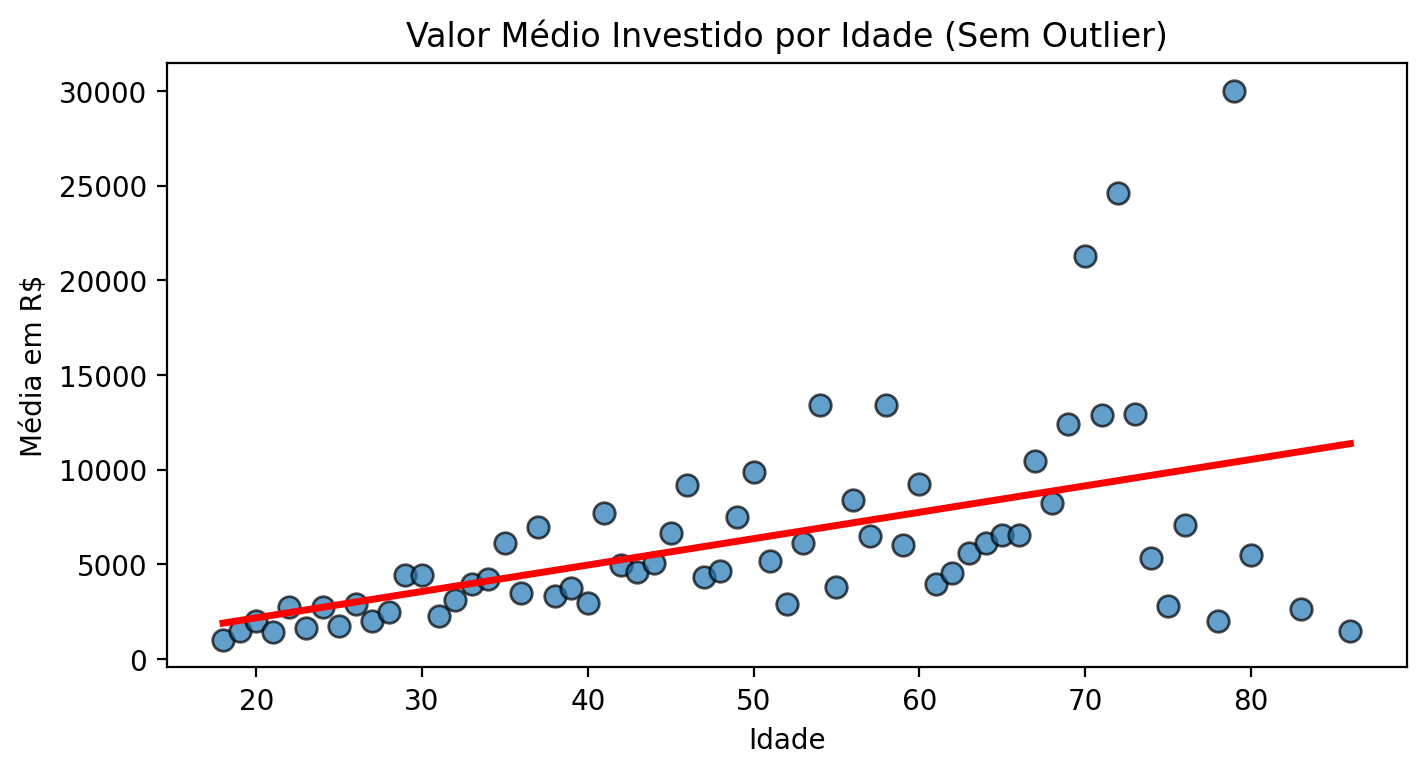

In [57]:
fig, ax = plt.subplots(figsize = (8, 4), dpi=200)
x_ = series_plot_no_outlier.index
y_ = series_plot_no_outlier.values
plt.xlabel('Idade')
plt.ylabel('Média em R$')
plt.title('Valor Médio Investido por Idade (Sem Outlier)')
ax.scatter(x_, y_, s=60, alpha=0.7, edgecolors="k")

b, a = resultado.coef_[0][0], resultado.intercept_[0]

xseq = np.linspace(series_plot_no_outlier.index.min(), series_plot_no_outlier.index.max())

ax.plot(xseq, a + b * xseq, color="r", lw=2.5)

plt.show()

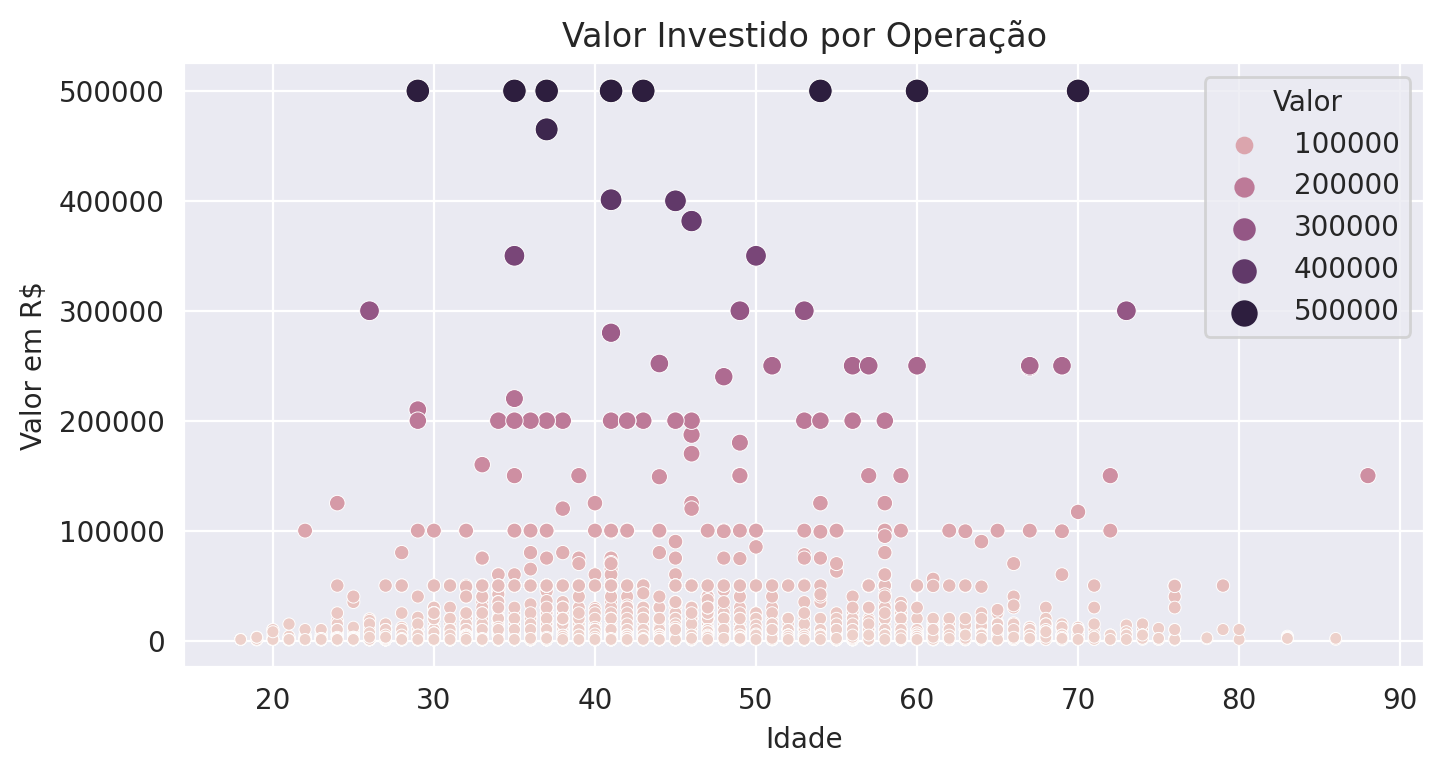

In [58]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style('darkgrid'):
    ax = sns.scatterplot(x='User_Idade', y='Valor', data=df_idade, hue='Valor', size='Valor')

    ax.set(ylabel='Valor em R$',
          xlabel='Idade',
          title='Valor Investido por Operação')

plt.show()

## CONCLUSÃO

#### Analisando o primeiro gráfico, parece haver uma relação em que investidores de meia-idade investem quantias maiores. Mas a distribuição é muito semelhante ao segundo gráfico, que nos mostra que a grande maioria dos investidores são de meia-idade

#### O terceiro gráfico mostra uma pequena tendência dos investidores mais velhos em investir quantias maiores, excluindo um  evidente outlier da amostra.

#### O último gráfico demonstra que não há uma tendência clara no padrão de investimentos por operação na amostra

In [59]:
df_valores = df[['Id', 'User_ID', 'Data De Depósito (Ou Compra)', 'Valor', 'Project Name', 'Tag']]
df_valores.head()

,Id,User_ID,Data De Depósito (Ou Compra),Valor,Project Name,Tag
0,85,13,2019-08-13,2000.0,Eirene Solutions,Agrotech
1,86,9,2019-08-12,1000.0,Eirene Solutions,Agrotech
2,89,643,2019-07-12,1000.0,Trashin,Cleantech
3,92,647,2019-07-23,1000.0,Trashin,Cleantech
4,93,647,2019-07-23,1000.0,Eirene Solutions,Agrotech


In [60]:
df_valores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15881 entries, 0 to 15881
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Id                            15881 non-null  int64         
 1   User_ID                       15881 non-null  int32         
 2   Data De Depósito (Ou Compra)  15881 non-null  datetime64[ns]
 3   Valor                         15881 non-null  float64       
 4   Project Name                  15881 non-null  object        
 5   Tag                           15881 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(1), int32(1), int64(1), object(1)
memory usage: 698.6+ KB


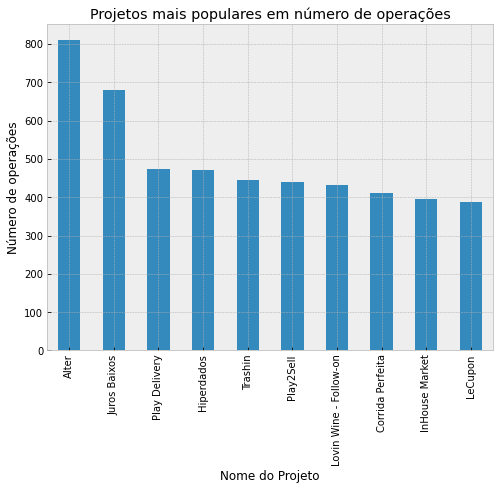

In [61]:
plt.style.use('bmh')

plt.figure(figsize=(8,6))

df_valores["Project Name"].value_counts().nlargest(10).plot(kind='bar',
                                                   title='Projetos mais populares em número de operações',
                                                   xlabel='Nome do Projeto',
                                                   ylabel='Número de operações')
plt.show()

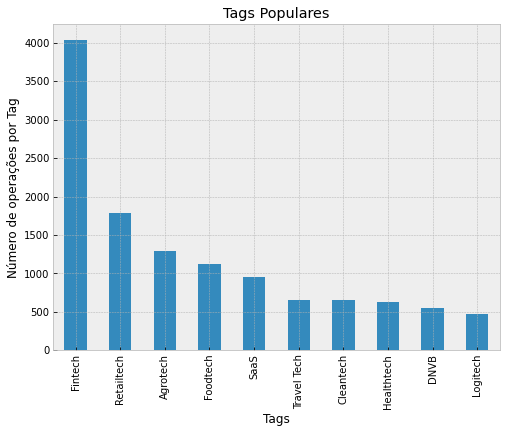

In [62]:
plt.style.use('bmh')

plt.figure(figsize=(8,6))

df_valores["Tag"].value_counts().nlargest(10).plot(kind='bar',
                                          title='Tags Populares',
                                          xlabel='Tags',
                                          ylabel='Número de operações por Tag')
plt.show()

In [63]:
# Como cada múltiplos projetos estão inseridos em uma tag, podemos criar um objeto de agregação nesse sentido
tags = df_valores.groupby("Tag")

In [64]:
tags["Valor"].sum().nlargest(10)

Tag
Fintech                17856200.0
Retailtech             10148500.0
Foodtech                9445800.0
Energy as a service     5000000.0
Travel Tech             4475000.0
Agrotech                3877300.0
SaaS                    3630000.0
Healthtech              2750000.0
DNVB                    2649000.0
Cleantech               2100000.0
Name: Valor, dtype: float64

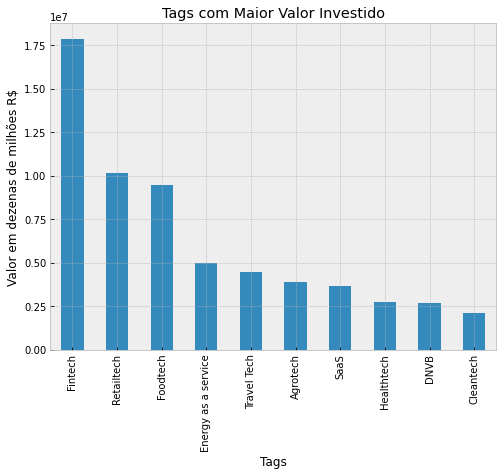

In [65]:
plt.style.use('bmh')

plt.figure(figsize=(8,6))

tags["Valor"].sum().nlargest(10).plot(kind='bar',
                                     title='Tags com Maior Valor Investido',
                                     xlabel='Tags',
                                     ylabel='Valor em dezenas de milhões R$')
plt.show()

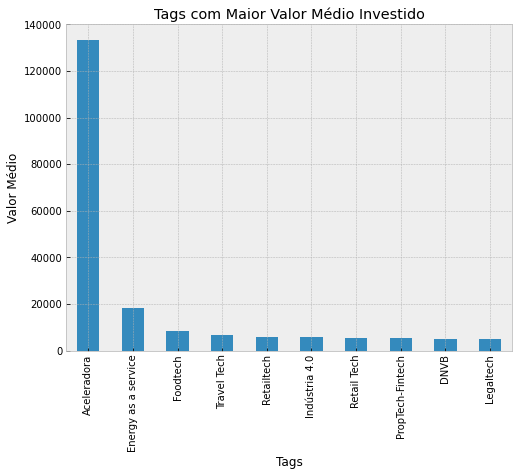

In [66]:
plt.style.use('bmh')

plt.figure(figsize=(8,6))

tags["Valor"].mean().nlargest(10).plot(kind='bar',
                                     title='Tags com Maior Valor Médio Investido',
                                     xlabel='Tags',
                                     ylabel='Valor Médio')
plt.show()

In [67]:
tags["Valor"].mean().sort_values(ascending=False).head()

Tag
Aceleradora            133333.333333
Energy as a service     18248.175182
Foodtech                 8403.736655
Travel Tech              6790.591806
Retailtech               5698.203257
Name: Valor, dtype: float64

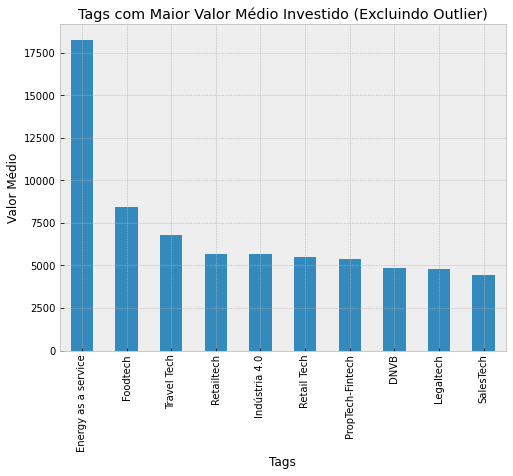

In [68]:
plt.style.use('bmh')

plt.figure(figsize=(8,6))

tags["Valor"].mean().nlargest(11)[1:].plot(kind='bar',
                                     title='Tags com Maior Valor Médio Investido (Excluindo Outlier)',
                                     xlabel='Tags',
                                     ylabel='Valor Médio')
plt.show()

In [69]:
tag_list = df_valores['Tag'].unique().tolist()

In [70]:
tags_dict = {}
for tag in tag_list:
    tags_dict[tag] = len(tags.get_group(tag)['Project Name'].unique().tolist())

In [71]:
sorted_dict = sorted(tags_dict.items(), key=lambda x: x[1], reverse=True)[:9]

In [72]:
sorted_dict

[('Fintech', 11),
 ('Retailtech', 7),
 ('Agrotech', 5),
 ('Foodtech', 5),
 ('Healthtech', 3),
 ('SaaS', 3),
 ('Travel Tech', 3),
 ('Cleantech', 2),
 ('DNVB', 2)]

In [73]:
tag_names = list(zip(*sorted_dict))[0]
projects_por_tag = list(zip(*sorted_dict))[1]
x_pos = np.arange(len(sorted_dict))

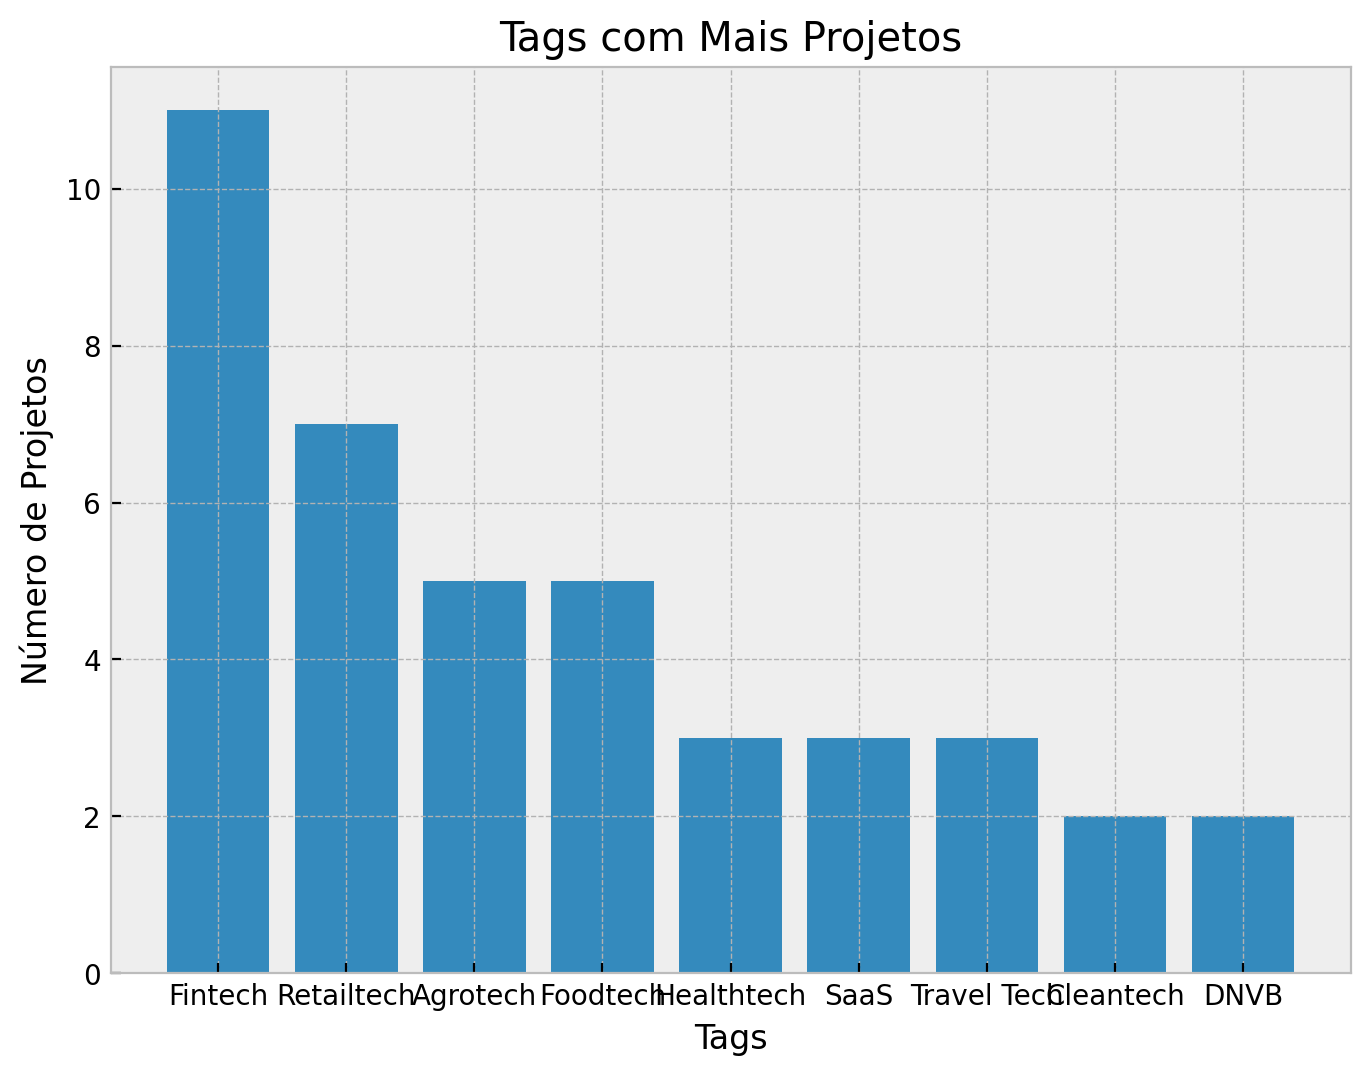

In [74]:
plt.style.use('bmh')


plt.figure(figsize=(8,6), dpi=200)

plt.bar(x_pos, projects_por_tag, align='center')
plt.xticks(x_pos, tag_names) 
plt.ylabel('Número de Projetos')
plt.xlabel('Tags')
plt.title('Tags com Mais Projetos')
plt.show()

In [75]:
users = df_valores.groupby("User_ID")

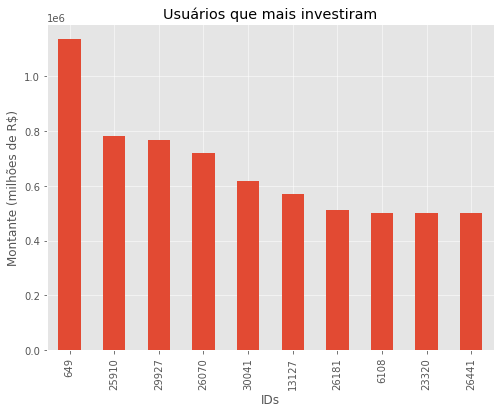

In [76]:
plt.style.use('ggplot')

plt.figure(figsize=(8,6))

users['Valor'].sum().nlargest(10).plot(kind='bar',
                                     title='Usuários que mais investiram',
                                     xlabel='IDs',
                                     ylabel='Montante (milhões de R$)')
plt.show()

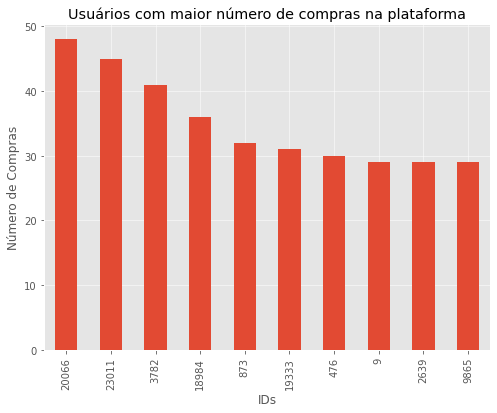

In [77]:
plt.style.use('ggplot')

plt.figure(figsize=(8,6))

users['Valor'].count().nlargest(10).plot(kind='bar',
                                     title='Usuários com maior número de compras na plataforma',
                                     xlabel='IDs',
                                     ylabel='Número de Compras')
plt.show()

In [78]:
projects = df_valores.groupby("Project Name")
projects["Valor"].sum().nlargest(10)

Project Name
Zletric                   5000000.0
Beeva                     4564000.0
Juros Baixos              3000000.0
Finansystech              2499000.0
Lovin Wine - Follow-on    2499000.0
Alter                     2137600.0
Lovin Wine                2000000.0
Orgânica 10.4.3           2000000.0
iFriend                   2000000.0
Play2Sell                 1949000.0
Name: Valor, dtype: float64

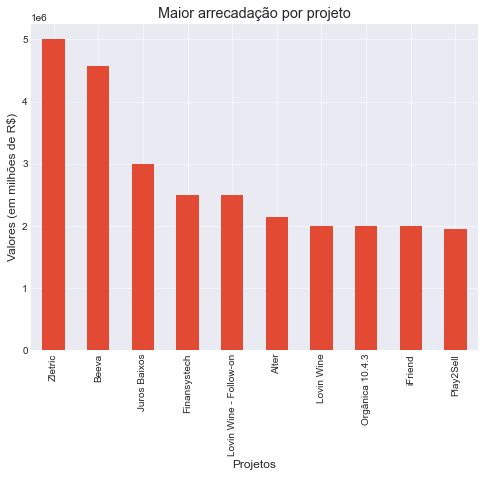

In [79]:
plt.style.use('seaborn-darkgrid')

plt.figure(figsize=(8,6))

projects["Valor"].sum().nlargest(10).plot(kind='bar', 
                                          title='Maior arrecadação por projeto', 
                                          ylabel='Valores (em milhões de R$)', 
                                          xlabel='Projetos')
plt.show()

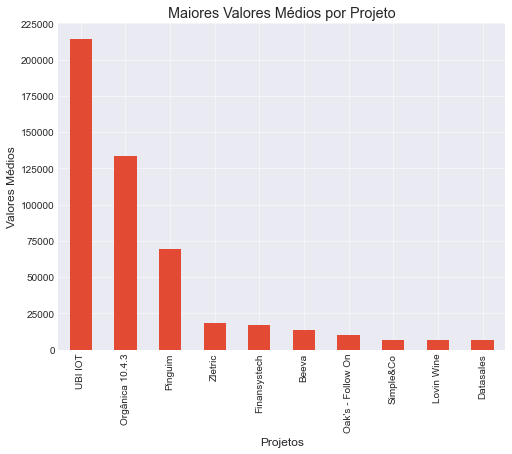

In [80]:
plt.style.use('seaborn-darkgrid')

plt.figure(figsize=(8,6))

projects["Valor"].mean().nlargest(10).plot(kind='bar', 
                                          title='Maiores Valores Médios por Projeto', 
                                          ylabel='Valores Médios', 
                                          xlabel='Projetos')
plt.show()

## CONCLUSÃO
### Com uma simples análise exploratória, conseguimos ver quais são os projetos e tags mais populares em relação ao valor investido e número de operações de compra. Também descobrimos quais são os clientes que mais investiram na plataforma, em termos do montante total e do número de compras.

### Além disso, podemos investigar se há alguma sazonalidade nos investimentos da plataforma: quais meses a plataforma recebe maior volume de investimentos? Para isso, temos apenas os anos completos de 2020 e 2021 para analisar.

In [81]:
df_valores.head()

,Id,User_ID,Data De Depósito (Ou Compra),Valor,Project Name,Tag
0,85,13,2019-08-13,2000.0,Eirene Solutions,Agrotech
1,86,9,2019-08-12,1000.0,Eirene Solutions,Agrotech
2,89,643,2019-07-12,1000.0,Trashin,Cleantech
3,92,647,2019-07-23,1000.0,Trashin,Cleantech
4,93,647,2019-07-23,1000.0,Eirene Solutions,Agrotech


In [82]:
df_valores['mes_compra'] = df_valores['Data De Depósito (Ou Compra)'].dt.month

In [83]:
df_valores_filtrado = df_valores.loc[(df_valores['Data De Depósito (Ou Compra)'].dt.year < 2022) & (df_valores['Data De Depósito (Ou Compra)'].dt.year > 2019)]

In [84]:
mes_agrup = df_valores_filtrado.groupby('mes_compra')

In [85]:
mes_agrup['Valor'].sum()

mes_compra
1     1090900.0
2     1040600.0
3     1217500.0
4     5799700.0
5     6299600.0
6     3120900.0
7     4797000.0
8     8282800.0
9     8783620.0
10    4254630.0
11    7336000.0
12    8641000.0
Name: Valor, dtype: float64

In [86]:
mes_agrup['Valor'].count()

mes_compra
1      347
2      318
3      447
4     1044
5     1068
6      910
7     1098
8     1356
9     1510
10    1222
11    1285
12    1067
Name: Valor, dtype: int64

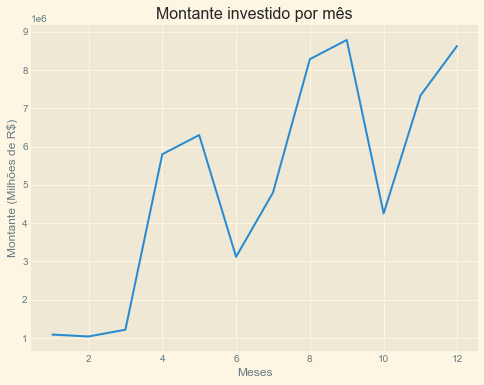

In [87]:
plt.style.use('Solarize_Light2')

plt.figure(figsize=(8,6))

mes_agrup["Valor"].sum().plot(kind='line', 
                                title='Montante investido por mês', 
                                ylabel='Montante (Milhões de R$)', 
                                xlabel='Meses')
plt.show()

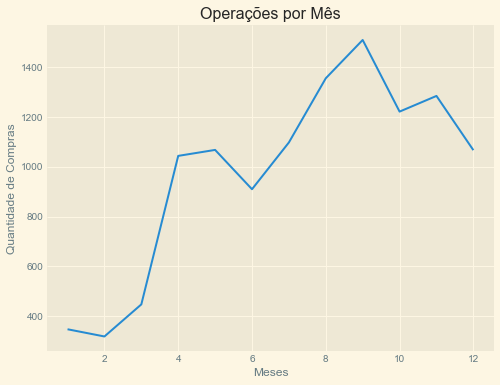

In [88]:
plt.style.use('Solarize_Light2')

plt.figure(figsize=(8,6))

mes_agrup["Valor"].count().plot(kind='line', 
                                title='Operações por Mês', 
                                ylabel='Quantidade de Compras', 
                                xlabel='Meses')
plt.show()

## CONCLUSÃO
### Parece haver uma certa sazonalidade nos investimentos na plataforma. Os primeiros meses do ano tendem a ser menos movimentados, enquanto os últimos tendem a ser mais.

In [89]:
df.head()

,Id,Valor,Data De Depósito (Ou Compra),Project Name,User_ID,User_birthday,Tag,User_Idade
0,85,2000.0,2019-08-13,Eirene Solutions,13,1992-04-30,Agrotech,30.0
1,86,1000.0,2019-08-12,Eirene Solutions,9,1982-05-27,Agrotech,40.0
2,89,1000.0,2019-07-12,Trashin,643,1980-12-07,Cleantech,41.0
3,92,1000.0,2019-07-23,Trashin,647,1986-08-12,Cleantech,35.0
4,93,1000.0,2019-07-23,Eirene Solutions,647,1986-08-12,Agrotech,35.0


In [90]:
df_acumulado = df.sort_values('Data De Depósito (Ou Compra)')

In [91]:
df_acumulado['Valor Somado'] = df_acumulado['Valor'].cumsum(axis=0)

In [92]:
df_acumulado.head(10)

,Id,Valor,Data De Depósito (Ou Compra),Project Name,User_ID,User_birthday,Tag,User_Idade,Valor Somado
14,114,1000.0,2019-07-10,Eirene Solutions,716,1967-03-07,Agrotech,55.0,1000.0
42,183,1000.0,2019-07-11,Eirene Solutions,888,1960-01-05,Agrotech,62.0,2000.0
38,172,1000.0,2019-07-12,Inbeauty,866,1981-12-09,Healthtech,40.0,3000.0
39,175,2000.0,2019-07-12,Inbeauty,687,1979-01-23,Healthtech,43.0,5000.0
33,161,1000.0,2019-07-12,Trashin,648,1983-03-18,Cleantech,39.0,6000.0
32,160,5000.0,2019-07-12,Trashin,826,1982-03-11,Cleantech,40.0,11000.0
31,158,1000.0,2019-07-12,Eirene Solutions,826,1982-03-11,Agrotech,40.0,12000.0
30,157,1000.0,2019-07-12,Inbeauty,648,1983-03-18,Healthtech,39.0,13000.0
29,156,2000.0,2019-07-12,Inbeauty,826,1982-03-11,Healthtech,40.0,15000.0
28,152,2000.0,2019-07-12,Trashin,818,1983-11-08,Cleantech,38.0,17000.0


In [93]:
df_acumulado.tail(10)

,Id,Valor,Data De Depósito (Ou Compra),Project Name,User_ID,User_birthday,Tag,User_Idade,Valor Somado
15785,34044,10000.0,2022-06-07,Auster,37629,1970-10-19,Agrotech,51.0,78873730.0
15811,34106,3000.0,2022-06-07,Auster,17361,1989-08-08,Agrotech,32.0,78876730.0
15616,33730,2000.0,2022-06-08,Auster,23011,1981-05-20,Agrotech,41.0,78878730.0
15634,33759,10000.0,2022-06-08,Auster,18697,1982-07-28,Agrotech,39.0,78888730.0
15697,33884,2000.0,2022-06-08,Auster,23483,1987-03-11,Agrotech,35.0,78890730.0
15864,34205,50000.0,2022-06-08,Auster,37603,1981-05-27,Agrotech,41.0,78940730.0
15289,33066,2000.0,2022-06-08,We Bro Pay,33130,1969-11-10,Fintech,52.0,78942730.0
15779,34030,2000.0,2022-06-08,Auster,30602,1997-10-14,Agrotech,24.0,78944730.0
15702,33899,3000.0,2022-06-08,Auster,24427,1973-05-08,Agrotech,49.0,78947730.0
15881,34280,1600.0,2022-06-08,4.events,1348,1963-02-28,SaaS,59.0,78949330.0


In [94]:
df_acumulado[['Data De Depósito (Ou Compra)', 'Valor Somado']]

,Data De Depósito (Ou Compra),Valor Somado
14,2019-07-10,1000.0
42,2019-07-11,2000.0
38,2019-07-12,3000.0
39,2019-07-12,5000.0
33,2019-07-12,6000.0
...,...,...
15864,2022-06-08,78940730.0
15289,2022-06-08,78942730.0
15779,2022-06-08,78944730.0
15702,2022-06-08,78947730.0


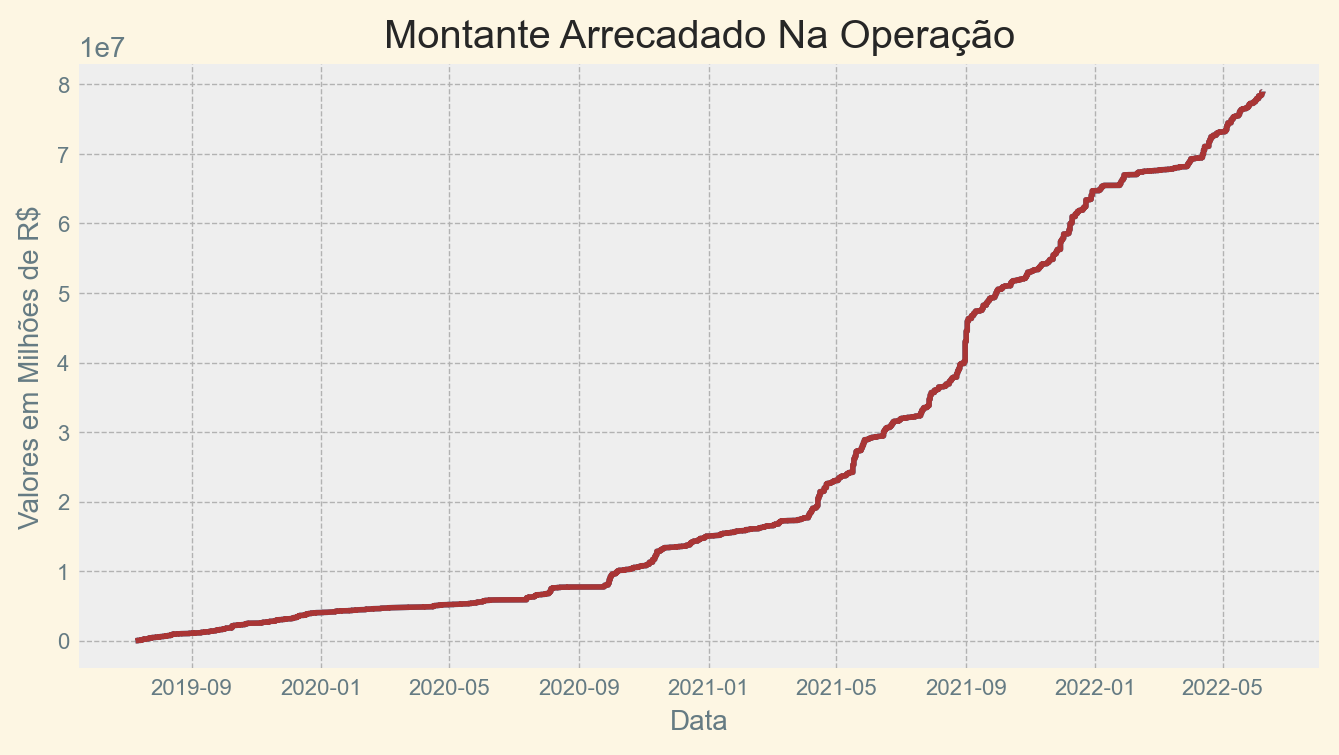

In [95]:
plt.style.use('bmh')
plt.figure(figsize=(8,4), dpi=200)
plt.plot(df_acumulado['Data De Depósito (Ou Compra)'], df_acumulado['Valor Somado'])
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel('Data', fontsize=10)
plt.ylabel('Valores em Milhões de R$', fontsize=10)
plt.title('Montante Arrecadado Na Operação')
     
plt.plot(df_acumulado['Data De Depósito (Ou Compra)'], df_acumulado['Valor Somado'], color='#a93535')

plt.show()

In [96]:
df_acumulado['Year'] = df_acumulado['Data De Depósito (Ou Compra)'].dt.year

In [97]:
df_acumulado.head(3)

,Id,Valor,Data De Depósito (Ou Compra),Project Name,User_ID,User_birthday,Tag,User_Idade,Valor Somado,Year
14,114,1000.0,2019-07-10,Eirene Solutions,716,1967-03-07,Agrotech,55.0,1000.0,2019
42,183,1000.0,2019-07-11,Eirene Solutions,888,1960-01-05,Agrotech,62.0,2000.0,2019
38,172,1000.0,2019-07-12,Inbeauty,866,1981-12-09,Healthtech,40.0,3000.0,2019


In [98]:
grouped_year = df_acumulado[['Year', 'Valor']].groupby('Year', as_index=False)

In [99]:
summed_grouped_year = grouped_year.sum()

In [100]:
summed_grouped_year

,Year,Valor
0,2019,4031000.0
1,2020,11015300.0
2,2021,49648950.0
3,2022,14254080.0


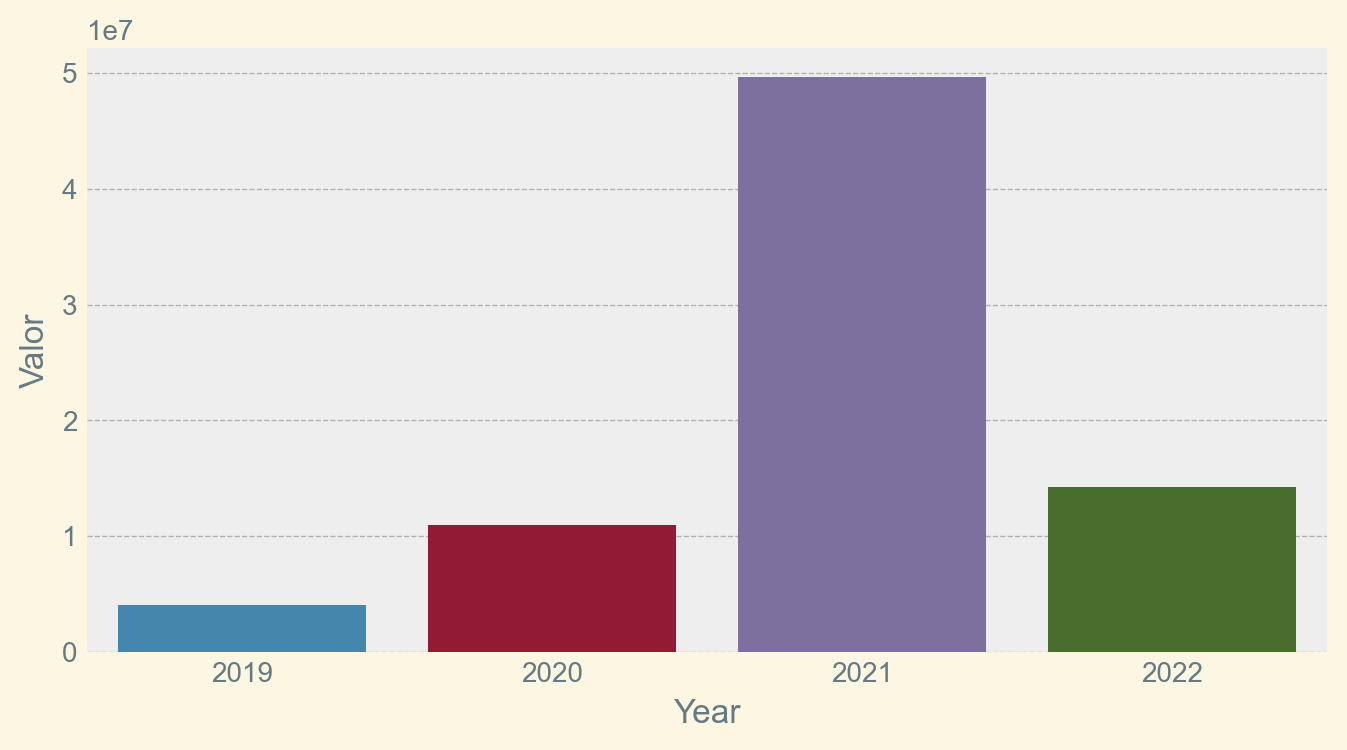

In [103]:
plt.figure(figsize=(8,4), dpi=200)

sns.barplot(data=summed_grouped_year, x='Year', y='Valor')
plt.show()